In [30]:
import keras
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import zipfile


In [2]:
# Data locs
# Image and data locs:
ziploc ="E:/School/UU/PATREC/CXR_project/"
imgloc = "E:/School/UU\PATREC/.darwin/datasets/v7-labs/covid-19-chest-x-ray-dataset/images/"
store_loc = "E:/School/UU/PATREC/.darwin/datasets/v7-labs/augmented_loc/"

# zip file locs
train_zf = zipfile.ZipFile(ziploc+'final_train_data.zip') 
val_zf = zipfile.ZipFile(ziploc+'final_val_data.zip') 
test_zf = zipfile.ZipFile(ziploc+'test_data.zip') 
train_df = pd.read_csv(train_zf.open('final_train_data.csv'))
val_df = pd.read_csv(val_zf.open('final_val_data.csv'))
test_df = pd.read_csv(test_zf.open('val_data.csv'))

#augmented image location
train_dir = "E:/School/UU/PATREC/.darwin/datasets/v7-labs/augmented_loc/train"
val_dir = "E:/School/UU/PATREC/.darwin/datasets/v7-labs/augmented_loc/val"

In [33]:
test_df

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename
0,00002438.jpeg,Bacterial Pneumonia,person543_bacteria_2279.jpeg,"{'path': [{'x': 338, 'y': 45}, {'x': 334, 'y':...","{'path': [{'x': 521, 'y': 32.0}, {'x': 521, 'y...",NaN,False,920.0,736.0,person543_bacteria_2279.json
1,00004180.jpeg,Bacterial Pneumonia,person1333_bacteria_3386.jpeg,"{'path': [{'x': 610, 'y': 165}, {'x': 608, 'y'...","{'path': [{'x': 443.0, 'y': 150}, {'x': 442, '...",NaN,False,1136.0,688.0,person1333_bacteria_3386.json
2,00002785.jpeg,Bacterial Pneumonia,person40_bacteria_202.jpeg,"{'path': [{'x': 438.0, 'y': 114}, {'x': 430, '...","{'path': [{'x': 612, 'y': 88}, {'x': 612, 'y':...",NaN,False,1216.0,960.0,person40_bacteria_202.json
3,00006195.jpeg,Bacterial Pneumonia,person133_bacteria_633.jpeg,"{'path': [{'x': 395, 'y': 25.0}, {'x': 394, 'y...","{'path': [{'x': 575, 'y': 41}, {'x': 572, 'y':...",NaN,False,976.0,632.0,person133_bacteria_633.json
4,00002224.jpeg,Bacterial Pneumonia,person71_bacteria_349.jpeg,"{'path': [{'x': 556, 'y': 83}, {'x': 556, 'y':...","{'path': [{'x': 325, 'y': 77}, {'x': 321, 'y':...",NaN,False,928.0,656.0,person71_bacteria_349.json
...,...,...,...,...,...,...,...,...,...,...
641,00006906.jpg,Viral Pneumonia,covid-19-pneumonia-58-day-9.jpg,"{'path': [{'x': 853.0, 'y': 129}, {'x': 838.0,...","{'path': [{'x': 1213, 'y': 170}, {'x': 1213, '...",View/PA,True,2267.0,1974.0,covid-19-pneumonia-58-day-9.json
642,00006644.jpg,Viral Pneumonia,887db78f.jpg,"{'path': [{'x': 1440, 'y': 187}, {'x': 1440, '...","{'path': [{'x': 1029, 'y': 190.0}, {'x': 1023,...",View/AP_Supine,True,2000.0,2000.0,887db78f.json
643,00006757.jpeg,Viral Pneumonia,66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg,NaN,NaN,View/Axial,True,1206.0,1263.0,66298CBF-6F10-42D5-A688-741F6AC84A76.json
644,00006774.jpg,Viral Pneumonia,a361d7b7.jpg,"{'path': [{'x': 806, 'y': 188}, {'x': 801.0, '...","{'path': [{'x': 1190.0, 'y': 155}, {'x': 1190....",View/PA,True,2000.0,2000.0,a361d7b7.json


In [3]:
train_df

,ogfilename,label
0,aug_000001-19.jpg_0_1447.png,B
1,aug_000001-19.jpg_0_2543.png,B
2,aug_000001-19.jpg_0_2778.png,B
3,aug_000001-19.jpg_0_3462.png,B
4,aug_000001-19.jpg_0_7687.png,B
...,...,...
9979,aug_yxppt-2020-02-19_00-51-27_287214-day10.jpg...,C
9980,aug_yxppt-2020-02-19_00-51-27_287214-day10.jpg...,C
9981,aug_yxppt-2020-02-19_00-51-27_287214-day10.jpg...,C
9982,aug_yxppt-2020-02-19_00-51-27_287214-day10.jpg...,C


In [4]:
val_df

,ogfilename,label
0,aug_02b76460.jpg_0_1447.png,C
1,aug_02b76460.jpg_0_2543.png,C
2,aug_02b76460.jpg_0_2778.png,C
3,aug_02b76460.jpg_0_3462.png,C
4,aug_02b76460.jpg_0_7687.png,C
...,...,...
1243,aug_yxppt-2020-02-19_00-51-27_287214-day8.jpg_...,C
1244,aug_yxppt-2020-02-19_00-51-27_287214-day8.jpg_...,C
1245,aug_yxppt-2020-02-19_00-51-27_287214-day8.jpg_...,C
1246,aug_yxppt-2020-02-19_00-51-27_287214-day8.jpg_...,C


In [5]:
test_df

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename
0,00002438.jpeg,Bacterial Pneumonia,person543_bacteria_2279.jpeg,"{'path': [{'x': 338, 'y': 45}, {'x': 334, 'y':...","{'path': [{'x': 521, 'y': 32.0}, {'x': 521, 'y...",NaN,False,920.0,736.0,person543_bacteria_2279.json
1,00004180.jpeg,Bacterial Pneumonia,person1333_bacteria_3386.jpeg,"{'path': [{'x': 610, 'y': 165}, {'x': 608, 'y'...","{'path': [{'x': 443.0, 'y': 150}, {'x': 442, '...",NaN,False,1136.0,688.0,person1333_bacteria_3386.json
2,00002785.jpeg,Bacterial Pneumonia,person40_bacteria_202.jpeg,"{'path': [{'x': 438.0, 'y': 114}, {'x': 430, '...","{'path': [{'x': 612, 'y': 88}, {'x': 612, 'y':...",NaN,False,1216.0,960.0,person40_bacteria_202.json
3,00006195.jpeg,Bacterial Pneumonia,person133_bacteria_633.jpeg,"{'path': [{'x': 395, 'y': 25.0}, {'x': 394, 'y...","{'path': [{'x': 575, 'y': 41}, {'x': 572, 'y':...",NaN,False,976.0,632.0,person133_bacteria_633.json
4,00002224.jpeg,Bacterial Pneumonia,person71_bacteria_349.jpeg,"{'path': [{'x': 556, 'y': 83}, {'x': 556, 'y':...","{'path': [{'x': 325, 'y': 77}, {'x': 321, 'y':...",NaN,False,928.0,656.0,person71_bacteria_349.json
...,...,...,...,...,...,...,...,...,...,...
641,00006906.jpg,Viral Pneumonia,covid-19-pneumonia-58-day-9.jpg,"{'path': [{'x': 853.0, 'y': 129}, {'x': 838.0,...","{'path': [{'x': 1213, 'y': 170}, {'x': 1213, '...",View/PA,True,2267.0,1974.0,covid-19-pneumonia-58-day-9.json
642,00006644.jpg,Viral Pneumonia,887db78f.jpg,"{'path': [{'x': 1440, 'y': 187}, {'x': 1440, '...","{'path': [{'x': 1029, 'y': 190.0}, {'x': 1023,...",View/AP_Supine,True,2000.0,2000.0,887db78f.json
643,00006757.jpeg,Viral Pneumonia,66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg,NaN,NaN,View/Axial,True,1206.0,1263.0,66298CBF-6F10-42D5-A688-741F6AC84A76.json
644,00006774.jpg,Viral Pneumonia,a361d7b7.jpg,"{'path': [{'x': 806, 'y': 188}, {'x': 801.0, '...","{'path': [{'x': 1190.0, 'y': 155}, {'x': 1190....",View/PA,True,2000.0,2000.0,a361d7b7.json


In [37]:
def label(df):
    df["label"] = np.nan
    df.loc[df["type"] == "No Pneumonia", 'label'] = "A"
    df.loc[df["type"] == "Bacterial Pneumonia", 'label'] = "B"
#     df.loc[df["type"] == "Fungal Pneumonia", 'label'] = "C"
    df.loc[df["type"] == "Viral Pneumonia", 'label'] = "D"
    df.loc[df["Covid"] == True, 'label'] = "C"
#     df.loc[df["type"] == "Undefined Pneumonia", 'label'] = "F"
    return df

test = label(test_df)
test_df = test[test['label'].notna()]

In [38]:
test_df

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename,label
0,00002438.jpeg,Bacterial Pneumonia,person543_bacteria_2279.jpeg,"{'path': [{'x': 338, 'y': 45}, {'x': 334, 'y':...","{'path': [{'x': 521, 'y': 32.0}, {'x': 521, 'y...",NaN,False,920.0,736.0,person543_bacteria_2279.json,B
1,00004180.jpeg,Bacterial Pneumonia,person1333_bacteria_3386.jpeg,"{'path': [{'x': 610, 'y': 165}, {'x': 608, 'y'...","{'path': [{'x': 443.0, 'y': 150}, {'x': 442, '...",NaN,False,1136.0,688.0,person1333_bacteria_3386.json,B
2,00002785.jpeg,Bacterial Pneumonia,person40_bacteria_202.jpeg,"{'path': [{'x': 438.0, 'y': 114}, {'x': 430, '...","{'path': [{'x': 612, 'y': 88}, {'x': 612, 'y':...",NaN,False,1216.0,960.0,person40_bacteria_202.json,B
3,00006195.jpeg,Bacterial Pneumonia,person133_bacteria_633.jpeg,"{'path': [{'x': 395, 'y': 25.0}, {'x': 394, 'y...","{'path': [{'x': 575, 'y': 41}, {'x': 572, 'y':...",NaN,False,976.0,632.0,person133_bacteria_633.json,B
4,00002224.jpeg,Bacterial Pneumonia,person71_bacteria_349.jpeg,"{'path': [{'x': 556, 'y': 83}, {'x': 556, 'y':...","{'path': [{'x': 325, 'y': 77}, {'x': 321, 'y':...",NaN,False,928.0,656.0,person71_bacteria_349.json,B
...,...,...,...,...,...,...,...,...,...,...,...
641,00006906.jpg,Viral Pneumonia,covid-19-pneumonia-58-day-9.jpg,"{'path': [{'x': 853.0, 'y': 129}, {'x': 838.0,...","{'path': [{'x': 1213, 'y': 170}, {'x': 1213, '...",View/PA,True,2267.0,1974.0,covid-19-pneumonia-58-day-9.json,C
642,00006644.jpg,Viral Pneumonia,887db78f.jpg,"{'path': [{'x': 1440, 'y': 187}, {'x': 1440, '...","{'path': [{'x': 1029, 'y': 190.0}, {'x': 1023,...",View/AP_Supine,True,2000.0,2000.0,887db78f.json,C
643,00006757.jpeg,Viral Pneumonia,66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg,NaN,NaN,View/Axial,True,1206.0,1263.0,66298CBF-6F10-42D5-A688-741F6AC84A76.json,C
644,00006774.jpg,Viral Pneumonia,a361d7b7.jpg,"{'path': [{'x': 806, 'y': 188}, {'x': 801.0, '...","{'path': [{'x': 1190.0, 'y': 155}, {'x': 1190....",View/PA,True,2000.0,2000.0,a361d7b7.json,C


In [6]:
# Resize data
#trdata = ImageDataGenerator()
#traindata = trdata.flow_from_directory(directory="data",target_size=(224,224))

#vldata = ImageDataGenerator()
#valdata = vldata.flow_from_directory(directory="data",target_size=(224,224))

#tsdata = ImageDataGenerator()
#testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

In [39]:
# rescale and reproduceabillity
seed = 4
datagenerator =  ImageDataGenerator(rescale= 1/255)

# Make train rescled
train_data = datagenerator.flow_from_dataframe(
        dataframe = train_df,
        directory = store_loc +"train",
        x_col = "ogfilename",
        y_col = "label",
        class_mode = "categorical",
        batch_size = 40,
        seed = seed,
        shuffle = True,
        target_size = (224,224), # changed values for vgg16
        keep_aspect_ratio = True,
        validate_filenames= True)

# Make val data
val_data = datagenerator.flow_from_dataframe(
        dataframe = val_df,
        directory = store_loc +"val",
        x_col = "ogfilename",
        y_col = "label",
        class_mode = "categorical",
        batch_size = 40,
        seed = seed,
        shuffle = True,
        target_size = (224,224), # changed values for vgg16
        keep_aspect_ratio = True,
        validate_filenames= True)

# Make test data
test_data = datagenerator.flow_from_dataframe(
        dataframe = test_df,
        directory = imgloc,
        x_col = "ogfilename",
        y_col = None,
        class_mode = None,
        batch_size = 1,
        seed = seed,
        shuffle = False,
        target_size = (224,224), # changed values for vgg16
        keep_aspect_ratio = True,
        validate_filenames= True)

Found 9984 validated image filenames belonging to 4 classes.
Found 1248 validated image filenames belonging to 4 classes.
Found 641 validated image filenames.


In [8]:
# VGG16 model
model = Sequential()
# block 1
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# Block 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# block 3
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#Block 4
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# Block 5
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3 linear connected layers at end of model
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax")) # 4 classes to softmax

# compile
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
#hist = model.fit(train_data, steps_per_epoch=100, epochs= 10, validation_data = val_data, validation_steps = 50)

In [11]:
model_vg = VGG16(weights='imagenet',include_top=False, input_shape = (224,224,3))
model_vg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
NUM_CLASSES = 4

vgg16 = Sequential()
vgg16.add(model_vg)
vgg16.add(Dropout(0.3))
vgg16.add(Flatten())
vgg16.add(Dropout(0.5))
vgg16.add(Dense(NUM_CLASSES, activation='sigmoid'))

vgg16.layers[0].trainable = False

vgg16.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)
vgg16.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=["accuracy"])

vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
import time

start = time.time()

vgg16_history = vgg16.fit(
    train_data,
    steps_per_epoch=50,
    epochs=120,
    validation_data=val_data,
    validation_steps=30,
)


end = time.time()
print(end - start)

Epoch 1/120
50/50 [==============================] - 15s 284ms/step - loss: 0.5411 - accuracy: 0.4550 - val_loss: 0.3788 - val_accuracy: 0.6575
Epoch 2/120
50/50 [==============================] - 14s 279ms/step - loss: 0.3904 - accuracy: 0.6480 - val_loss: 0.3141 - val_accuracy: 0.7950
Epoch 3/120
50/50 [==============================] - 14s 277ms/step - loss: 0.3412 - accuracy: 0.7137 - val_loss: 0.2918 - val_accuracy: 0.8083
Epoch 4/120
50/50 [==============================] - 14s 279ms/step - loss: 0.3119 - accuracy: 0.7380 - val_loss: 0.2835 - val_accuracy: 0.8092
Epoch 5/120
50/50 [==============================] - 14s 279ms/step - loss: 0.3018 - accuracy: 0.7495 - val_loss: 0.2649 - val_accuracy: 0.8267
Epoch 6/120
50/50 [==============================] - 14s 278ms/step - loss: 0.2922 - accuracy: 0.7566 - val_loss: 0.2593 - val_accuracy: 0.8225
Epoch 7/120
50/50 [==============================] - 14s 281ms/step - loss: 0.2891 - accuracy: 0.7545 - val_loss: 0.2575 - val_accuracy:

50/50 [==============================] - 14s 283ms/step - loss: 0.2149 - accuracy: 0.8265 - val_loss: 0.2119 - val_accuracy: 0.8550
Epoch 58/120
50/50 [==============================] - 14s 283ms/step - loss: 0.1999 - accuracy: 0.8485 - val_loss: 0.2104 - val_accuracy: 0.8533
Epoch 59/120
50/50 [==============================] - 14s 282ms/step - loss: 0.2054 - accuracy: 0.8372 - val_loss: 0.2097 - val_accuracy: 0.8600
Epoch 60/120
50/50 [==============================] - 14s 285ms/step - loss: 0.2058 - accuracy: 0.8330 - val_loss: 0.2109 - val_accuracy: 0.8608
Epoch 61/120
50/50 [==============================] - 14s 285ms/step - loss: 0.2025 - accuracy: 0.8390 - val_loss: 0.2165 - val_accuracy: 0.8542
Epoch 62/120
50/50 [==============================] - 14s 285ms/step - loss: 0.1939 - accuracy: 0.8405 - val_loss: 0.2097 - val_accuracy: 0.8608
Epoch 63/120
50/50 [==============================] - 14s 282ms/step - loss: 0.2071 - accuracy: 0.8266 - val_loss: 0.2240 - val_accuracy: 0.838

50/50 [==============================] - 14s 284ms/step - loss: 0.1881 - accuracy: 0.8490 - val_loss: 0.2112 - val_accuracy: 0.8625
Epoch 114/120
50/50 [==============================] - 14s 284ms/step - loss: 0.1735 - accuracy: 0.8665 - val_loss: 0.2171 - val_accuracy: 0.8542
Epoch 115/120
50/50 [==============================] - 14s 283ms/step - loss: 0.1793 - accuracy: 0.8600 - val_loss: 0.2121 - val_accuracy: 0.8575
Epoch 116/120
50/50 [==============================] - 14s 284ms/step - loss: 0.1776 - accuracy: 0.8645 - val_loss: 0.2107 - val_accuracy: 0.8625
Epoch 117/120
50/50 [==============================] - 14s 284ms/step - loss: 0.1863 - accuracy: 0.8555 - val_loss: 0.2312 - val_accuracy: 0.8358
Epoch 118/120
50/50 [==============================] - 14s 284ms/step - loss: 0.1776 - accuracy: 0.8650 - val_loss: 0.2304 - val_accuracy: 0.8475
Epoch 119/120
50/50 [==============================] - 14s 284ms/step - loss: 0.1838 - accuracy: 0.8550 - val_loss: 0.2161 - val_accuracy:

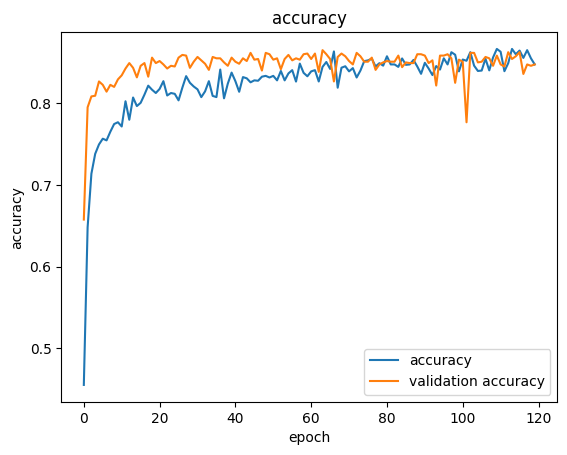

In [14]:
import matplotlib.pyplot as plt
plt.plot(vgg16_history.history["accuracy"])
plt.plot(vgg16_history.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.title("accuracy")
plt.show()

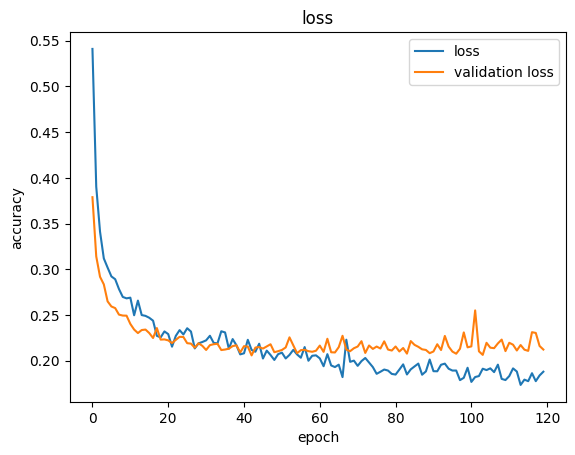

In [15]:
plt.plot(vgg16_history.history["loss"])
plt.plot(vgg16_history.history["val_loss"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.title("loss")
plt.show()

In [16]:
# save weights
vgg16.save_weights('./checkpoints/VGG16_imagenet_weighted_offline_augment')

In [17]:
unweighted_vgg = VGG16(weights=None,include_top=False, input_shape = (224,224,3))
NUM_CLASSES = 4

un_vgg16 = Sequential()
un_vgg16.add(unweighted_vgg)
un_vgg16.add(Dropout(0.3))
un_vgg16.add(Flatten())
un_vgg16.add(Dropout(0.5))
un_vgg16.add(Dense(NUM_CLASSES, activation='sigmoid'))

un_vgg16.layers[0].trainable = True

un_vgg16.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)
un_vgg16.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=["accuracy"])

un_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 14,815,044
Non-trainable params: 0
_________________________________________________________________


In [18]:

start = time.time()

un_vgg16_history = un_vgg16.fit(
    train_data,
    steps_per_epoch=50,
    epochs=120,
    validation_data=val_data,
    validation_steps=30,
)


end = time.time()
print(end - start)

Epoch 1/120
50/50 [==============================] - 46s 908ms/step - loss: 0.5907 - accuracy: 0.2555 - val_loss: 0.5611 - val_accuracy: 0.3242
Epoch 2/120
50/50 [==============================] - 45s 903ms/step - loss: 0.5288 - accuracy: 0.4110 - val_loss: 0.5244 - val_accuracy: 0.4367
Epoch 3/120
50/50 [==============================] - 45s 901ms/step - loss: 0.4792 - accuracy: 0.5220 - val_loss: 0.4702 - val_accuracy: 0.5433
Epoch 4/120
50/50 [==============================] - 45s 901ms/step - loss: 0.4465 - accuracy: 0.5650 - val_loss: 0.4661 - val_accuracy: 0.5358
Epoch 5/120
50/50 [==============================] - 45s 901ms/step - loss: 0.4189 - accuracy: 0.5795 - val_loss: 0.4288 - val_accuracy: 0.6058
Epoch 6/120
50/50 [==============================] - 45s 902ms/step - loss: 0.4131 - accuracy: 0.5870 - val_loss: 0.4221 - val_accuracy: 0.5833
Epoch 7/120
50/50 [==============================] - 45s 901ms/step - loss: 0.3899 - accuracy: 0.6215 - val_loss: 0.3941 - val_accuracy:

50/50 [==============================] - 45s 899ms/step - loss: 0.1268 - accuracy: 0.9080 - val_loss: 0.2951 - val_accuracy: 0.8167
Epoch 58/120
50/50 [==============================] - 45s 898ms/step - loss: 0.1349 - accuracy: 0.9010 - val_loss: 0.2664 - val_accuracy: 0.8200
Epoch 59/120
50/50 [==============================] - 45s 898ms/step - loss: 0.1288 - accuracy: 0.9010 - val_loss: 0.3046 - val_accuracy: 0.7958
Epoch 60/120
50/50 [==============================] - 45s 892ms/step - loss: 0.1297 - accuracy: 0.9042 - val_loss: 0.3153 - val_accuracy: 0.8050
Epoch 61/120
50/50 [==============================] - 45s 900ms/step - loss: 0.1207 - accuracy: 0.9080 - val_loss: 0.2874 - val_accuracy: 0.8050
Epoch 62/120
50/50 [==============================] - 45s 899ms/step - loss: 0.1072 - accuracy: 0.9215 - val_loss: 0.3184 - val_accuracy: 0.8000
Epoch 63/120
50/50 [==============================] - 45s 899ms/step - loss: 0.1190 - accuracy: 0.9130 - val_loss: 0.2913 - val_accuracy: 0.813

50/50 [==============================] - 45s 896ms/step - loss: 0.0146 - accuracy: 0.9930 - val_loss: 0.6048 - val_accuracy: 0.7975
Epoch 114/120
50/50 [==============================] - 45s 897ms/step - loss: 0.0232 - accuracy: 0.9865 - val_loss: 0.5327 - val_accuracy: 0.8042
Epoch 115/120
50/50 [==============================] - 45s 897ms/step - loss: 0.0236 - accuracy: 0.9885 - val_loss: 0.5781 - val_accuracy: 0.8067
Epoch 116/120
50/50 [==============================] - 45s 896ms/step - loss: 0.0146 - accuracy: 0.9930 - val_loss: 0.6434 - val_accuracy: 0.8200
Epoch 117/120
50/50 [==============================] - 45s 896ms/step - loss: 0.0103 - accuracy: 0.9960 - val_loss: 0.7347 - val_accuracy: 0.8117
Epoch 118/120
50/50 [==============================] - 44s 889ms/step - loss: 0.0150 - accuracy: 0.9940 - val_loss: 0.6572 - val_accuracy: 0.8100
Epoch 119/120
50/50 [==============================] - 45s 897ms/step - loss: 0.0285 - accuracy: 0.9850 - val_loss: 0.5207 - val_accuracy:

In [20]:
un_vgg16.save_weights('./checkpoints/VGG16_unweighted_offline_augment')

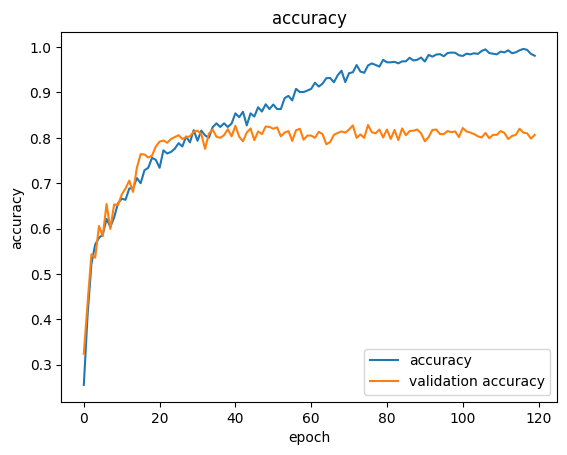

In [21]:
import matplotlib.pyplot as plt
plt.plot(un_vgg16_history.history["accuracy"])
plt.plot(un_vgg16_history.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.title("accuracy")
plt.show()

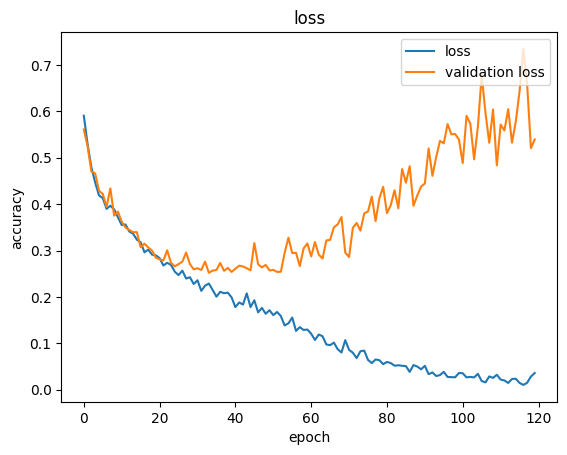

In [22]:
plt.plot(un_vgg16_history.history["loss"])
plt.plot(un_vgg16_history.history["val_loss"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.title("loss")
plt.show()

In [24]:
freeweighted_vgg = VGG16(weights="imagenet",include_top=False, input_shape = (224,224,3))
NUM_CLASSES = 4

free_vgg16 = Sequential()
free_vgg16.add(freeweighted_vgg)
free_vgg16.add(Dropout(0.3))
free_vgg16.add(Flatten())
free_vgg16.add(Dropout(0.5))
free_vgg16.add(Dense(NUM_CLASSES, activation='sigmoid'))

free_vgg16.layers[0].trainable = True

free_vgg16.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)
free_vgg16.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), metrics=["accuracy"])

free_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_7 (Dropout)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 14,815,044
Non-trainable params: 0
_________________________________________________________________


In [26]:

start = time.time()

free_vgg16_history = free_vgg16.fit(
    train_data,
    steps_per_epoch=50,
    epochs=120,
    validation_data=val_data,
    validation_steps=30,
)


end = time.time()
print(end - start)

Epoch 1/120
50/50 [==============================] - 46s 906ms/step - loss: 0.5911 - accuracy: 0.2530 - val_loss: 0.5603 - val_accuracy: 0.3625
Epoch 2/120
50/50 [==============================] - 45s 894ms/step - loss: 0.5359 - accuracy: 0.3921 - val_loss: 0.5232 - val_accuracy: 0.4108
Epoch 3/120
50/50 [==============================] - 45s 901ms/step - loss: 0.4486 - accuracy: 0.5365 - val_loss: 0.4196 - val_accuracy: 0.6142
Epoch 4/120
50/50 [==============================] - 45s 901ms/step - loss: 0.3906 - accuracy: 0.6125 - val_loss: 0.3774 - val_accuracy: 0.6308
Epoch 5/120
50/50 [==============================] - 45s 903ms/step - loss: 0.3541 - accuracy: 0.6640 - val_loss: 0.3266 - val_accuracy: 0.7000
Epoch 6/120
50/50 [==============================] - 45s 902ms/step - loss: 0.3341 - accuracy: 0.6650 - val_loss: 0.3686 - val_accuracy: 0.6617
Epoch 7/120
50/50 [==============================] - 45s 902ms/step - loss: 0.3285 - accuracy: 0.6810 - val_loss: 0.3162 - val_accuracy:

50/50 [==============================] - 45s 897ms/step - loss: 0.1287 - accuracy: 0.8987 - val_loss: 0.2592 - val_accuracy: 0.8233
Epoch 58/120
50/50 [==============================] - 45s 899ms/step - loss: 0.1103 - accuracy: 0.9150 - val_loss: 0.2471 - val_accuracy: 0.8242
Epoch 59/120
50/50 [==============================] - 45s 900ms/step - loss: 0.0980 - accuracy: 0.9260 - val_loss: 0.3148 - val_accuracy: 0.8175
Epoch 60/120
50/50 [==============================] - 45s 894ms/step - loss: 0.1135 - accuracy: 0.9138 - val_loss: 0.2923 - val_accuracy: 0.8325
Epoch 61/120
50/50 [==============================] - 45s 901ms/step - loss: 0.1129 - accuracy: 0.9140 - val_loss: 0.2453 - val_accuracy: 0.8183
Epoch 62/120
50/50 [==============================] - 45s 900ms/step - loss: 0.1149 - accuracy: 0.9145 - val_loss: 0.2820 - val_accuracy: 0.8242
Epoch 63/120
50/50 [==============================] - 45s 899ms/step - loss: 0.1169 - accuracy: 0.9165 - val_loss: 0.3105 - val_accuracy: 0.810

50/50 [==============================] - 45s 899ms/step - loss: 0.0242 - accuracy: 0.9825 - val_loss: 0.5248 - val_accuracy: 0.8108
Epoch 114/120
50/50 [==============================] - 45s 892ms/step - loss: 0.0106 - accuracy: 0.9929 - val_loss: 0.5662 - val_accuracy: 0.8400
Epoch 115/120
50/50 [==============================] - 45s 899ms/step - loss: 0.0137 - accuracy: 0.9925 - val_loss: 0.6650 - val_accuracy: 0.8208
Epoch 116/120
50/50 [==============================] - 45s 898ms/step - loss: 0.0298 - accuracy: 0.9830 - val_loss: 0.5343 - val_accuracy: 0.8550
Epoch 117/120
50/50 [==============================] - 45s 891ms/step - loss: 0.0318 - accuracy: 0.9798 - val_loss: 0.5376 - val_accuracy: 0.8233
Epoch 118/120
50/50 [==============================] - 45s 899ms/step - loss: 0.0298 - accuracy: 0.9800 - val_loss: 0.4906 - val_accuracy: 0.7858
Epoch 119/120
50/50 [==============================] - 45s 892ms/step - loss: 0.0553 - accuracy: 0.9688 - val_loss: 0.5173 - val_accuracy:

In [27]:
free_vgg16.save_weights('./checkpoints/VGG16_free_weighted_offline_augment')

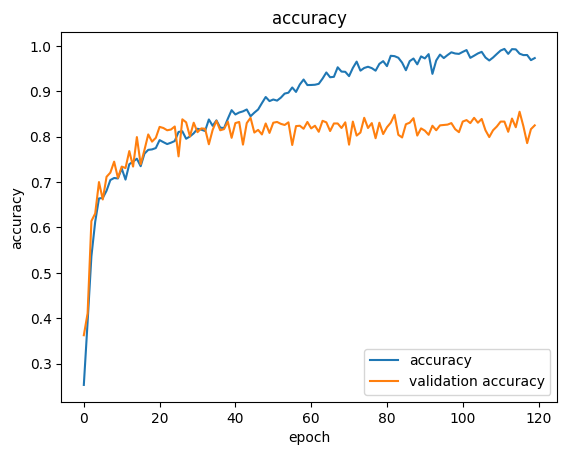

In [28]:
import matplotlib.pyplot as plt
plt.plot(free_vgg16_history.history["accuracy"])
plt.plot(free_vgg16_history.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.title("accuracy")
plt.show()

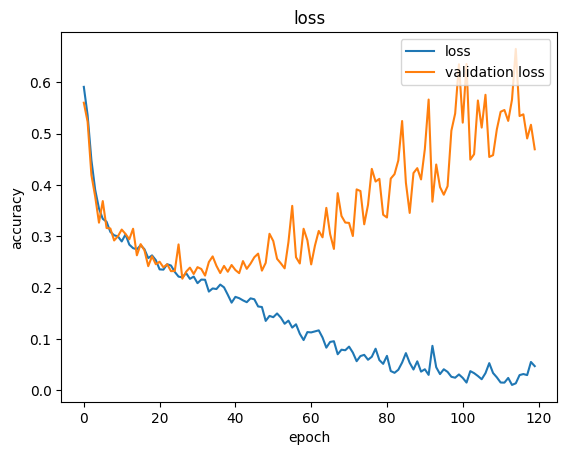

In [29]:
plt.plot(free_vgg16_history.history["loss"])
plt.plot(free_vgg16_history.history["val_loss"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.title("loss")
plt.show()

In [42]:
locked_y_prediction = free_vgg16.predict(test_data)
locked_result = confusion_matrix(test_df.label, locked_y_prediction , normalize='pred')

641/641 [==============================] - 6s 10ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [43]:
locked_y_prediction

array([[4.2323707e-05, 2.2609679e-02, 2.2522677e-01, 3.7239116e-01],
       [5.8780410e-05, 1.9682148e-02, 9.8773148e-03, 9.3732101e-01],
       [1.4978914e-03, 4.5187455e-02, 3.8345961e-04, 8.1406736e-01],
       ...,
       [1.7692348e-05, 3.1493616e-06, 9.9999988e-01, 2.2412992e-07],
       [4.7407958e-09, 1.9426750e-08, 1.0000000e+00, 5.9042320e-12],
       [6.5975524e-07, 1.4047052e-09, 1.0000000e+00, 3.8852328e-12]],
      dtype=float32)

In [ ]:
keras.metrics.categorical_accuracy(test_df.label, y_pred)